In [16]:
import pandas as pd 
import os 
import glob 
from hmmlearn.hmm import GMMHMM
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.stats as scs 
import glob 
import os 

In [5]:
df = pd.read_csv(r'C:\Users\shen_\Code\dragon\GA_Shane\outputs\20250423_012533_wdxpA4\RB99_1m_output_axis.csv')

Project:  20250423_012533_wdxpA4
file:  c:/Users/shen_/Code/dragon/GA_Shane/outputs/20250423_012533_wdxpA4\RB99_1m_output_axis.csv


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at c:\Users\shen_\Code\dragon\GA_Shane\functions.py (59)[0m
[1m
File "..\..\..\functions.py", line 59:[0m
[1mdef range_(arr,):
    <source elided>

[1m@numba.njit(fastmath=True, cache=True)
[0m[1m^[0m[0m

[0m[1mDuring: Pass nopython_type_inference[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'pandas.core.series.Series'>[0m


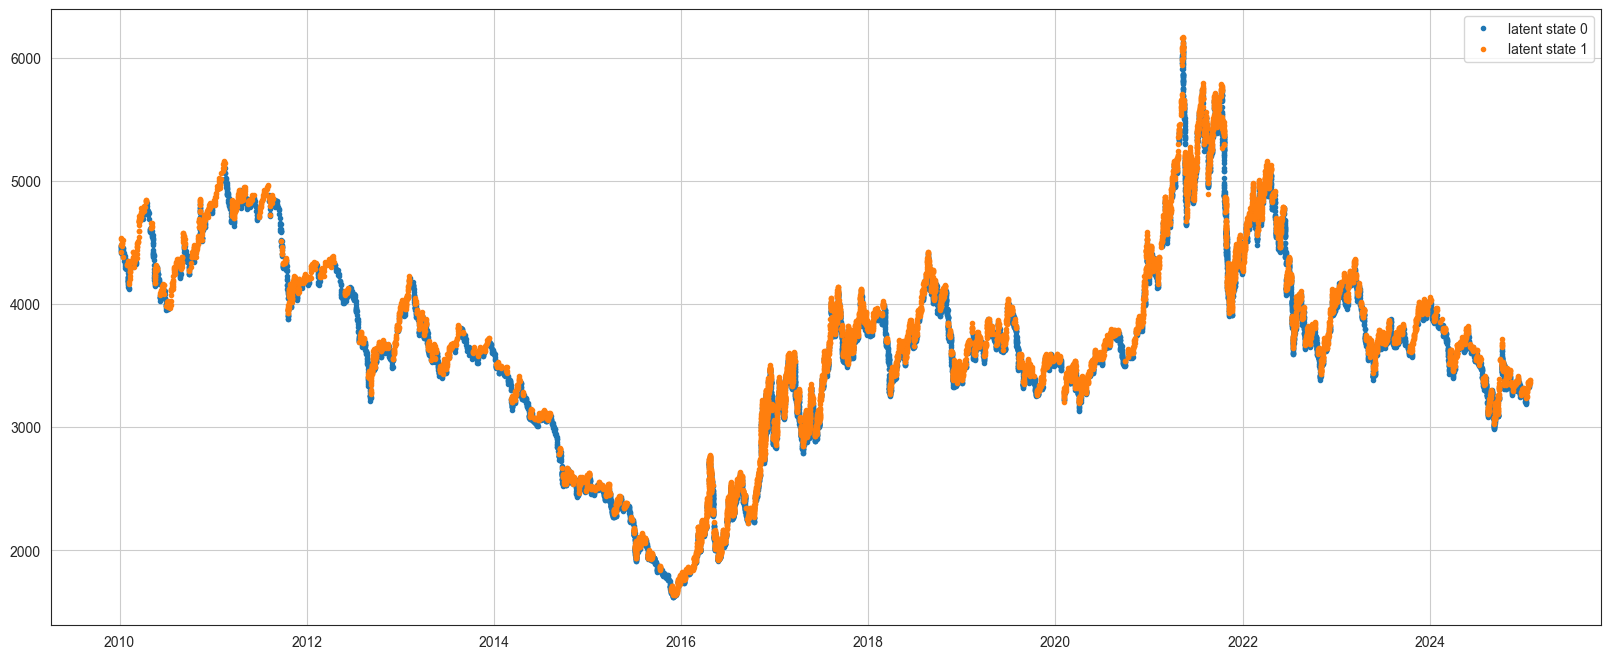

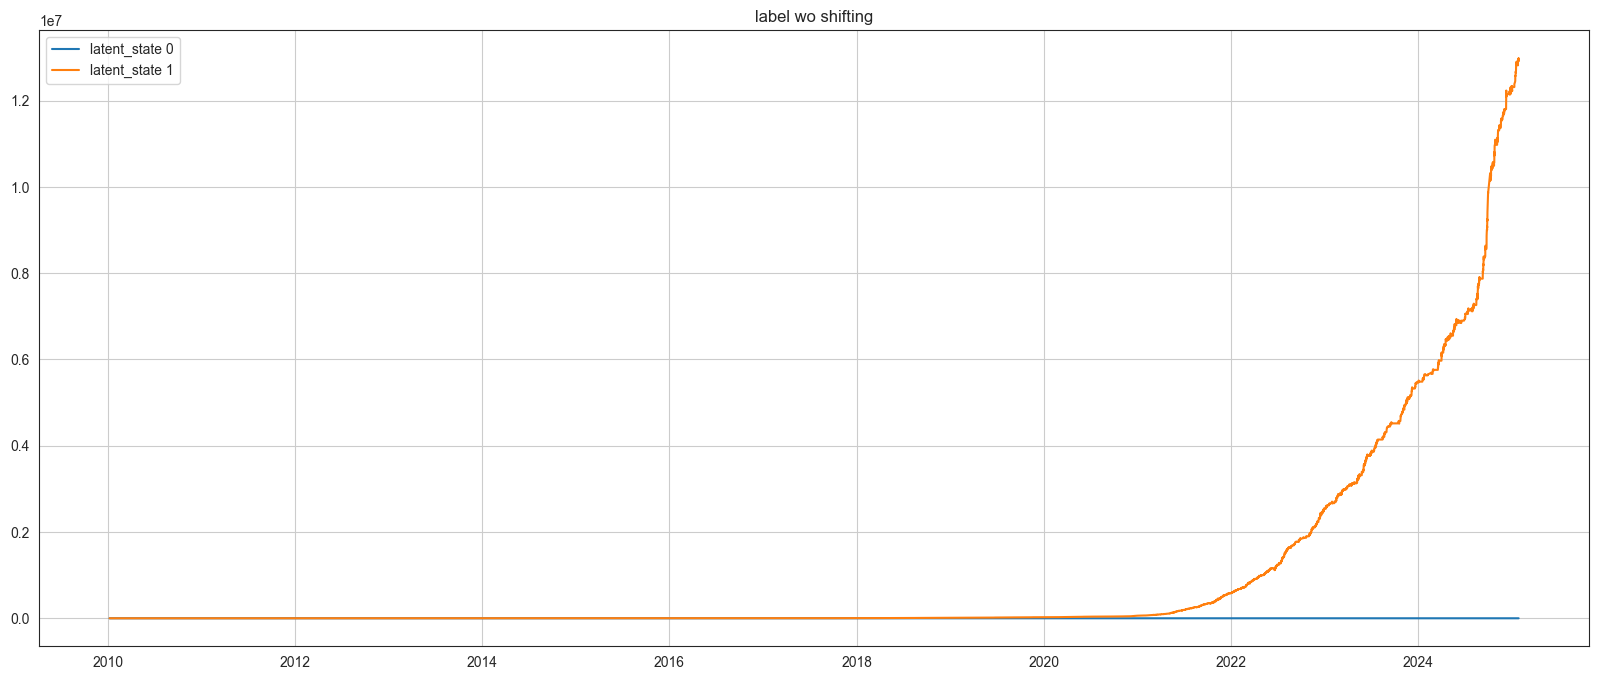

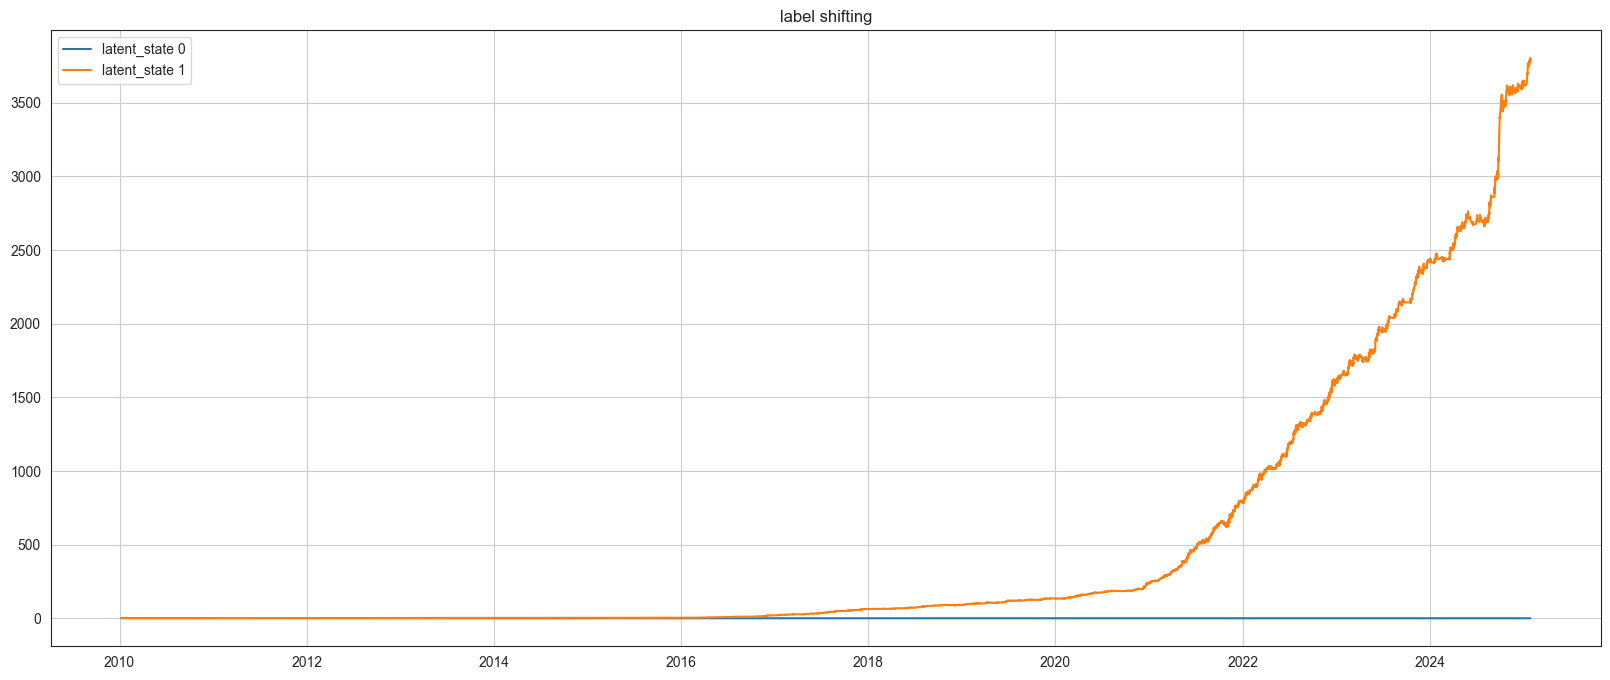

In [17]:
part = '20250423_012533_wdxpA4'
project_pth = f'c:/Users/shen_/Code/dragon/GA_Shane/outputs/{part}'

os.chdir(project_pth)

file = glob.glob(project_pth+'/*_output_axis.csv')[0]

os.makedirs(project_pth+'/picture',exist_ok=True)
os.chdir(project_pth+'/picture')

print("Project: ",part)
print("file: ",file)

L = 7    
diff = 1     ### 1是有HLdiff，0是没有HLdiff
mix = 3    ### GMM mix参数

df = pd.read_csv(file)
close = df['close']
high = df['high'][L:]
low = df['low'][L:]
eob = df['eob']
datelist = pd.to_datetime(eob[L:])

logreturn = (np.log(np.array(close[1:]))-np.log(np.array(close[:-1])))[(L-1):]
logreturnX = np.log(np.array(close[L:]))-np.log(np.array(close[:-L]))
HLdiff = (np.log(np.array(high))-np.log(np.array(low)))

closeidx = close[L:]

if diff == 1:
    X = np.column_stack([HLdiff ,logreturnX,logreturn])
    
else:
    X = np.column_stack([logreturnX,logreturn])

gmm = GMMHMM(n_components = 2, n_mix=mix, covariance_type='diag', n_iter = 369, random_state = 369).fit(X)

latent_states_sequence = gmm.predict(X)
latent_states_proba = gmm.predict_proba(X)[:,0]
latent_states_proba = np.abs(latent_states_proba-0.5)

sns.set_style('white')
plt.figure(figsize = (20, 8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    plt.plot(datelist[state],closeidx[state],'.',label = 'latent state %d'%i,lw = 1)
    plt.legend()
    plt.grid(1)

plt.savefig(f"Label_{L}.jpg")     


data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence}).set_index('datelist')

plt.figure(figsize=(20,8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[1:])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 
    plt.plot(np.exp(data['state %d_return' %i].cumsum()),label = 'latent_state %d'%i)
    plt.legend(loc='upper left')
    plt.grid(1)
    plt.title('label wo shifting')

plt.savefig(f"Label_a_{L}.jpg")     

data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence}).set_index('datelist')

plt.figure(figsize=(20,8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[:-1])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 
    plt.plot(np.exp(data['state %d_return' %i].cumsum()),label = 'latent_state %d'%i)
    plt.legend(loc='upper left')
    plt.grid(1)
    plt.title('label shifting')
    
plt.savefig(f"Label_b_{L}.jpg")     ##############  保存图片    #####################


# 自动判断，将标签的 1与0，变为buy为1，sell为0
data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence,'state_p':latent_states_proba}).set_index('datelist')
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[:-1])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 

if sum(data['state 0_return']) > sum(data['state 1_return']):
    data['state'] = abs(data['state'] - 1)
    

In [18]:
df = pd.read_csv(file).tail(20)
close = df['close']
high = df['high'][L:]
low = df['low'][L:]
eob = df['eob']
datelist = pd.to_datetime(eob[L:])

logreturn = (np.log(np.array(close[1:]))-np.log(np.array(close[:-1])))[(L-1):]
logreturnX = np.log(np.array(close[L:]))-np.log(np.array(close[:-L]))
HLdiff = (np.log(np.array(high))-np.log(np.array(low)))

closeidx = close[L:]

if diff == 1:
    X = np.column_stack([HLdiff ,logreturnX,logreturn])
    
else:
    X = np.column_stack([logreturnX,logreturn])

gmm = GMMHMM(n_components = 2, n_mix=mix, covariance_type='diag', n_iter = 369, random_state = 369).fit(X)

latent_states_sequence = gmm.predict(X)
latent_states_proba = gmm.predict_proba(X)[:,0]
latent_states_proba = np.abs(latent_states_proba-0.5)

# 自动判断，将标签的 1与0，变为buy为1，sell为0
data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence,'state_p':latent_states_proba}).set_index('datelist')
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[:-1])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 


Fitting a model with 41 free scalar parameters with only 39 data points will result in a degenerate solution.
Degenerate mixture covariance
Degenerate mixture covariance


In [22]:
df['log_return'] = np.log(df['close']).diff()
df.tail(10)[['eob','close','log_return']]

,eob,close,log_return
21273,2025-01-23 10:00:00,3359.5130,-0.003024
21274,2025-01-23 10:59:00,3346.6955,-0.003823
21275,2025-01-23 21:09:00,3355.0068,0.002480
21276,2025-01-24 09:43:00,3344.3685,-0.003176
21277,2025-01-24 13:54:00,3344.3037,-0.000019
21278,2025-01-24 14:20:00,3373.7909,0.008778
21279,2025-01-24 21:02:00,3360.6993,-0.003888
21280,2025-01-27 09:08:00,3387.2453,0.007868
21281,2025-01-27 13:33:00,3370.0551,-0.005088
21282,2025-01-27 15:00:00,3385.2618,0.004502


In [21]:
data.reset_index().tail(10)

,datelist,logreturn,state,state_p,state 0_return,state 1_return
3,2025-01-23 10:00:00,-0.003024,1,0.5,-0.000000,-0.003024
4,2025-01-23 10:59:00,-0.003823,1,0.5,-0.000000,-0.003823
5,2025-01-23 21:09:00,0.002480,1,0.5,0.000000,0.002480
6,2025-01-24 09:43:00,-0.003176,1,0.5,-0.000000,-0.003176
7,2025-01-24 13:54:00,-0.000019,1,0.5,-0.000000,-0.000019
8,2025-01-24 14:20:00,0.008778,0,0.5,0.000000,0.008778
9,2025-01-24 21:02:00,-0.003888,0,0.5,-0.003888,-0.000000
10,2025-01-27 09:08:00,0.007868,0,0.5,0.007868,0.000000
11,2025-01-27 13:33:00,-0.005088,0,0.5,-0.005088,-0.000000
12,2025-01-27 15:00:00,0.004502,0,0.5,0.004502,0.000000


In [2]:

import os 
import numpy as np
import pandas as pd
import polars as pl 
import warnings 

import glob
import tsfel
from tqdm import tqdm
from joblib import Parallel, delayed

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv

from functions import *

warnings.filterwarnings('ignore')
load_dotenv()

part = os.getenv('part')

dir = f'c:/Users/shen_/Code/dragon/GA_Shane/outputs/{part}'

code = 'RB'
test_start = '2023-01-01'

print('Init with :', part)

"""
Function
"""
def assert_equal(a, b, ):
    if a != b:
        raise ValueError(f"Bars not equals {a} != {b}")

###********************* this is key to training and avoiding overfit. ************
fix = 513
# label_shift = 8
label_shift = 6


shift_params = [10,20]
window_size = 10 

""" 
Data 
"""
file_name_1 = glob.glob(os.path.join(dir, '*_output_axis.csv'))[0]
df = pd.read_csv(file_name_1).sort_values('eob')

file_name_2 = glob.glob(os.path.join(dir, f'*_output_axis_Label_{str(fix)}.csv'))[0]
df_label = pd.read_csv(file_name_2)


# df = df.merge(df_label[['datelist','state']], left_on='eob',right_on='datelist',how='left')
# df_label = df[['eob','state']]
# df.drop(columns=['datelist'],inplace=True)

Init with : 20250424_003413_oMFt2l


In [6]:
df = df[['eob','close','group']]
df['log_return2'] = np.log(df['close']).diff()

In [ ]:
df_label['']

,datelist,logreturn,state,state 0_return,state 1_return
0,2010-01-06 09:22:00,0.006611,1,0.000000,0.0
1,2010-01-06 14:59:00,0.001957,1,0.001957,0.0
2,2010-01-07 09:03:00,0.004608,1,0.004608,0.0
3,2010-01-07 10:07:00,-0.010495,1,-0.010495,-0.0
4,2010-01-07 10:09:00,-0.012231,1,-0.012231,-0.0
...,...,...,...,...,...
22495,2025-01-24 21:02:00,-0.003888,1,-0.003888,-0.0
22496,2025-01-24 22:54:00,0.002705,1,0.002705,0.0
22497,2025-01-27 09:36:00,0.003452,1,0.003452,0.0
22498,2025-01-27 13:31:00,-0.003027,1,-0.003027,-0.0


In [9]:
df

,eob,close,group,log_return2
0,2010-01-04 09:20:00,4487.2551,0,NaN
1,2010-01-04 11:15:00,4510.4979,1,0.005166
2,2010-01-04 14:59:00,4509.1928,2,-0.000289
3,2010-01-05 09:43:00,4514.6774,3,0.001216
4,2010-01-05 14:56:00,4526.4184,4,0.002597
...,...,...,...,...
22500,2025-01-24 21:02:00,3360.6993,22500,-0.003888
22501,2025-01-24 22:54:00,3369.8019,22501,0.002705
22502,2025-01-27 09:36:00,3381.4543,22502,0.003452
22503,2025-01-27 13:31:00,3371.2355,22503,-0.003027
